# Data Science with Python DS07 - K Neighbours
In this workshop we continue using the Sci-Kit Learn library. This time we look into the K nearest neighbours algorithm.

In [1]:
# Run this cell if you have not installed Sci-Kit Learn yet
!pip install sklearn

### Importing
Note that neighbours for any Sci-Kit Learn function is spelt in the American way: ````neighbors````. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors

### Reading the Data 
The two code cells below generate a data frame from the "RedBlue.csv" file and plot the data. Run both these code cells.

In [3]:
# Creates a data frame from the "RedBlue.csv" file
df = pd.read_csv("RedBlue.csv")
df

,x,y,Colour
0,10.4,8.8,blue
1,4.6,5.8,red
2,11.2,9.0,blue
3,9.8,11.4,blue
4,11.0,11.8,blue
5,8.4,10.4,blue
6,3.8,4.6,red
7,8.6,11.2,blue
8,8.4,8.0,blue
9,5.0,6.8,red


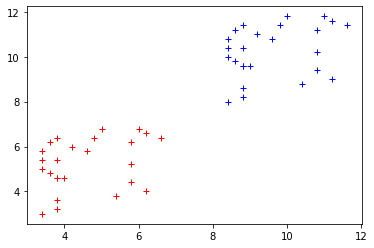

In [16]:
# Splits rows based on the colour in the "Colour" column
red = df.loc[df["Colour"] == "red"]
blue =  df.loc[df["Colour"] == "blue"]

# Plots the red data and the blue data
plt.plot(red["x"],red["y"],"r+")
plt.plot(blue["x"],blue["y"],"b+")

### The Problem
As you can see in the plot above we have data seperated into two sets. In this data set there is a red set and a blue set. More generally we could have other ways of distinguishing two groups ie the two groups could represent two different blood types for example or perhaps whether a particular project is successful or not. What if we had another point or set of points that were not yet assigned to red or blue? How would we determine which group they belong to? One could do this by eye of course but if you had to many points to classify this is not ideal. Do we have a better more quantitative way classifying these points? In this workshop we will explore one such approach to classifying these data points.
## K Nearest Neighbours
When classifying the points by eye we are trying to determine which set of data the point is closest to. With K nearest neighbours we look for K number of points closest to the data point we are trying to classify. If most of the closest points are red we will assign our data point to the red group. If there are more close blue points closer to the point we will classify it blue. Our choice of K will likely affect the outcome of such a prediction. It is also generally suggested that odd values are chosen for K because an even value could lead to the same number of close red and blue points.
### Preprocessing 
Just like in the case of the linear regression algorithm, the first step is preprocessing data. As you can see from the code cell below very little changes from what we did before. First we define our independent variables as ````X````. In this case our positions along the ````x```` and ````y```` axis will be defined as ````X```` so we need only drop the ````"Colour"```` column for this. Our dependent variable ````y```` we define as the thing we are predicting. In this case this is the ````"Colour"```` column. Then we use ````train_test_split```` to allocate the test and training data passing through ````X```` and ````y```` with a ````test_size```` argument to specify how much is allocated to each set.

In [6]:
# Independent variables
X = df.drop("Colour", axis=1)

# Dependent variable 
y = df["Colour"]

# Allocates 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Training and Scoring
Once again very little changes from last time. Instead of using ````regressor```` we use ````clf````, short for classifier to denote that we are using a classification algorithm. Instead of calling the ````LinearRegression```` algorithm we call ````neighbors.KNeighborsClassifier```` to choose the K nearest neighbours algorithm. We can specify the value of K with the argument ````n_neighbors````. By default this is $5$ but here we will set it to $7$ for no particular reason. For more interesting data sets you should try playing around with this value to see what values boost the accuracy of your model. Training is done by passing the training data through ````clf.fit````. For the K nearest neighbours algorithm the training is specifying the points we want to compare test data too. Scoring is done by passing test data through ````clf_trained.score````. When we score or make a prediction with K nearest neighbours the distance between that point and all others is determined. It then finds the K nearest of those points to classify the test point. As you can imagine with large data sets this can become incredibly cumbersome. Here our regions are red and blue data are very neatly seperated and our test data is well within it's respective group. It is only natural that the score is $1$ meaning $100\%$ accuracy. Of course such an idolised case is extremely unlikely to happen in practice. 

In [15]:
# Chooses the K nearest neighbour algorithm for our classifier

clf = neighbors.KNeighborsClassifier(n_neighbors=7)

# Training the classifier
clf_trained = clf.fit(X_train,y_train)

# Scoring the classifier
clf_trained.score(X_test,y_test)

1.0

### Making Predictions
Here we will pass a few unseen test points into our classifier to see what it predicts.
#### [10,10]
Quite clearly in the blue region so our model should return blue.

In [11]:
# Defining an unclassified point 
test_point = np.array([[10,10]])

# Making a prediction
clf_trained.predict(test_point)

array(['blue'], dtype=object)

#### [5,5]
Quite clearly in the red region so our model should return red.

In [12]:
# Defining an unclassified point 
test_point = np.array([[5,5]])

# Making a prediction
clf_trained.predict(test_point)

array(['red'], dtype=object)

### Beyond 2D
As with linear regression most real world data includes many more variables than in the data set we looked at in this workshop. It should be fairly intuitive to see how a 3D dimensional case of K nearest neighbours might work because with three independent variables our two groups of data exist in 3D-space rather than 2D-space. It might be less intuitive to consider cases with more variables. However, this problem is best left to the machine to solve as Sci-Kit Learn is designed to consider such cases. All that we need to do is present the data to the classifier to train it in order to start making predictions. To solve a case with more independant variables we simply do the same thing we did for the linear regression algorithm by simply including the relevant columns while preprocessing the data.
## EDUKATE.ai
EDUKATE.ai is a platform intended to aid university students who seek to learn about machine learning and data science by providing a number of related projects for them to try. Based on the outcome of the projects personalised feedback is provided to help students improve their code along with reading recommendations. EDUKATE.ai also provides a means of connecting with technical employers. More information on EDUKATE.ai can be found here https://edukate.ai/.